In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28*28))/ 255.0
test_images = test_images.reshape((10000, 28*28))/255.0

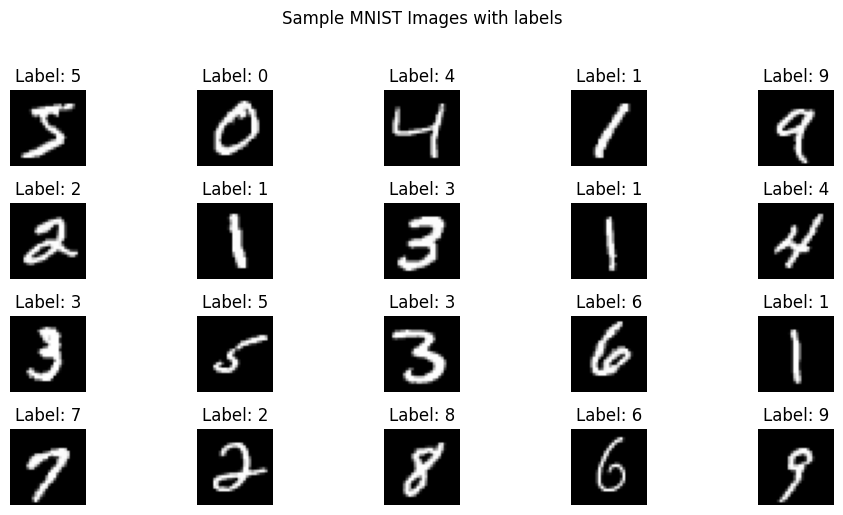

In [4]:
plt.figure(figsize = (10, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap = 'gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.suptitle('Sample MNIST Images with labels', y = 1.02)
plt.tight_layout()
plt.show()

In [5]:
from tensorflow.keras import regularizers

model = models.Sequential([
    layers.Dense(1024, activation='swish', kernel_regularizer=regularizers.l2(1e-4), input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(512, activation='swish', kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='swish', kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Dense(10, activation='softmax')
])

C:\Users\VIGHNESH\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [7]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

lr_schedule = ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.5, patience=2, verbose=1
)

early_stop = EarlyStopping(
    monitor='val_accuracy', patience=5, restore_best_weights=True
)

history = model.fit(
    train_images, train_labels,
    epochs=75,
    batch_size=128,
    validation_data=(test_images, test_labels),
    callbacks=[lr_schedule, early_stop]
)

Epoch 1/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.8838 - loss: 0.5571 - val_accuracy: 0.9699 - val_loss: 0.2622 - learning_rate: 0.0010
Epoch 2/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9603 - loss: 0.2862 - val_accuracy: 0.9722 - val_loss: 0.2385 - learning_rate: 0.0010
Epoch 3/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9709 - loss: 0.2446 - val_accuracy: 0.9772 - val_loss: 0.2180 - learning_rate: 0.0010
Epoch 4/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9751 - loss: 0.2224 - val_accuracy: 0.9761 - val_loss: 0.2131 - learning_rate: 0.0010
Epoch 5/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9763 - loss: 0.2084 - val_accuracy: 0.9807 - val_loss: 0.1960 - learning_rate: 0.0010
Epoch 6/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9781 - loss: 0.1982 - val_accuracy: 0.9791 - val_loss: 0.1942 - learning_rate: 0.0010
Epoch 7/75
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9799 - lo

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9847 - loss: 0.1085

Test accuracy: 0.9882
